# Sentiment Analysis

## Task 3

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
 
df_emergencyplus_google = pd.read_csv('emergency-plus google.csv')
df_firstaid_google = pd.read_csv('Red-cross-google.csv')
df_emergencyplus_apple = pd.read_csv('emergency-plus-apple.csv')
df_firstaid_apple = pd.read_csv('redcross-apple.csv')
    
def sentimentAnalysis(app_review_df):
    reviews = app_review_df['Review'].values.tolist();
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []

    for sentence in reviews:
        vs = analyzer.polarity_scores(sentence)

        #print(vs["compound"])
        if(vs["compound"] >= 0.05):
            sentiments.append(1) 
        elif(vs["compound"] > -0.05):
            sentiments.append(0)
        elif(vs["compound"] <= -0.05):
            sentiments.append(-1) 

    app_review_df["sentiment"] = sentiments
    
    return app_review_df


df_emergencyplus_google_s = sentimentAnalysis(df_emergencyplus_google)
df_emergencyplus_apple_s = sentimentAnalysis(df_emergencyplus_apple)

df_firstaid_google_s = sentimentAnalysis(df_firstaid_google)
df_firstaid_apple_s = sentimentAnalysis(df_firstaid_apple)

df_emergencyplus_combined_s = pd.concat([df_emergencyplus_google, df_emergencyplus_apple])
df_firstaid_combined_s = pd.concat([df_firstaid_google, df_firstaid_apple])

df_emergencyplus_combined_s.to_csv('emergencyplus_combined_sentiment.csv', encoding='utf-8')
df_firstaid_combined_s.to_csv('firstaid_combined_sentiment.csv', encoding='utf-8')

## Task 4.1 - plotting rating over time

C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\2800703529.py:30: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\2800703529.py:33: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\2800703529.py:33: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\2800703529.py:30: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is

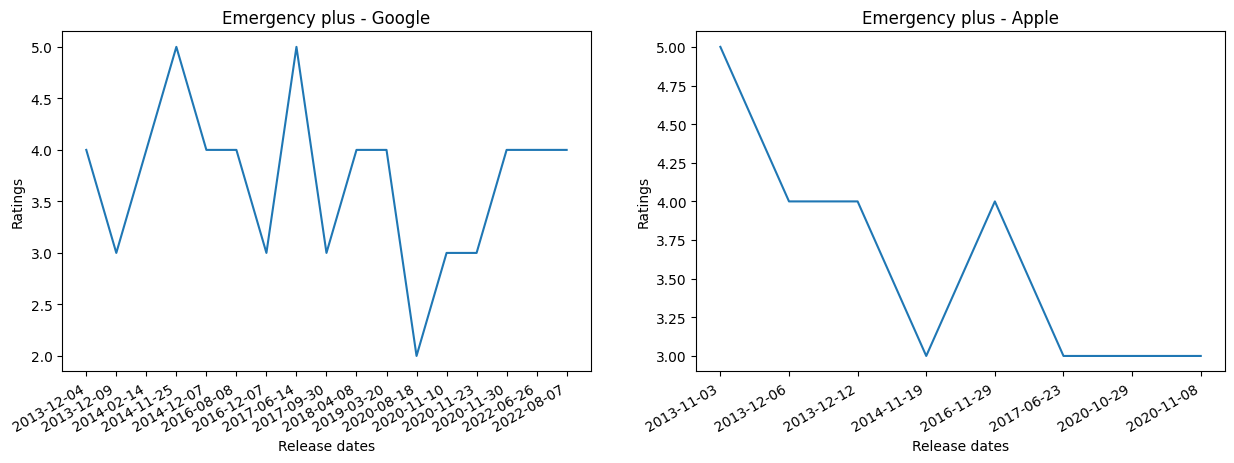

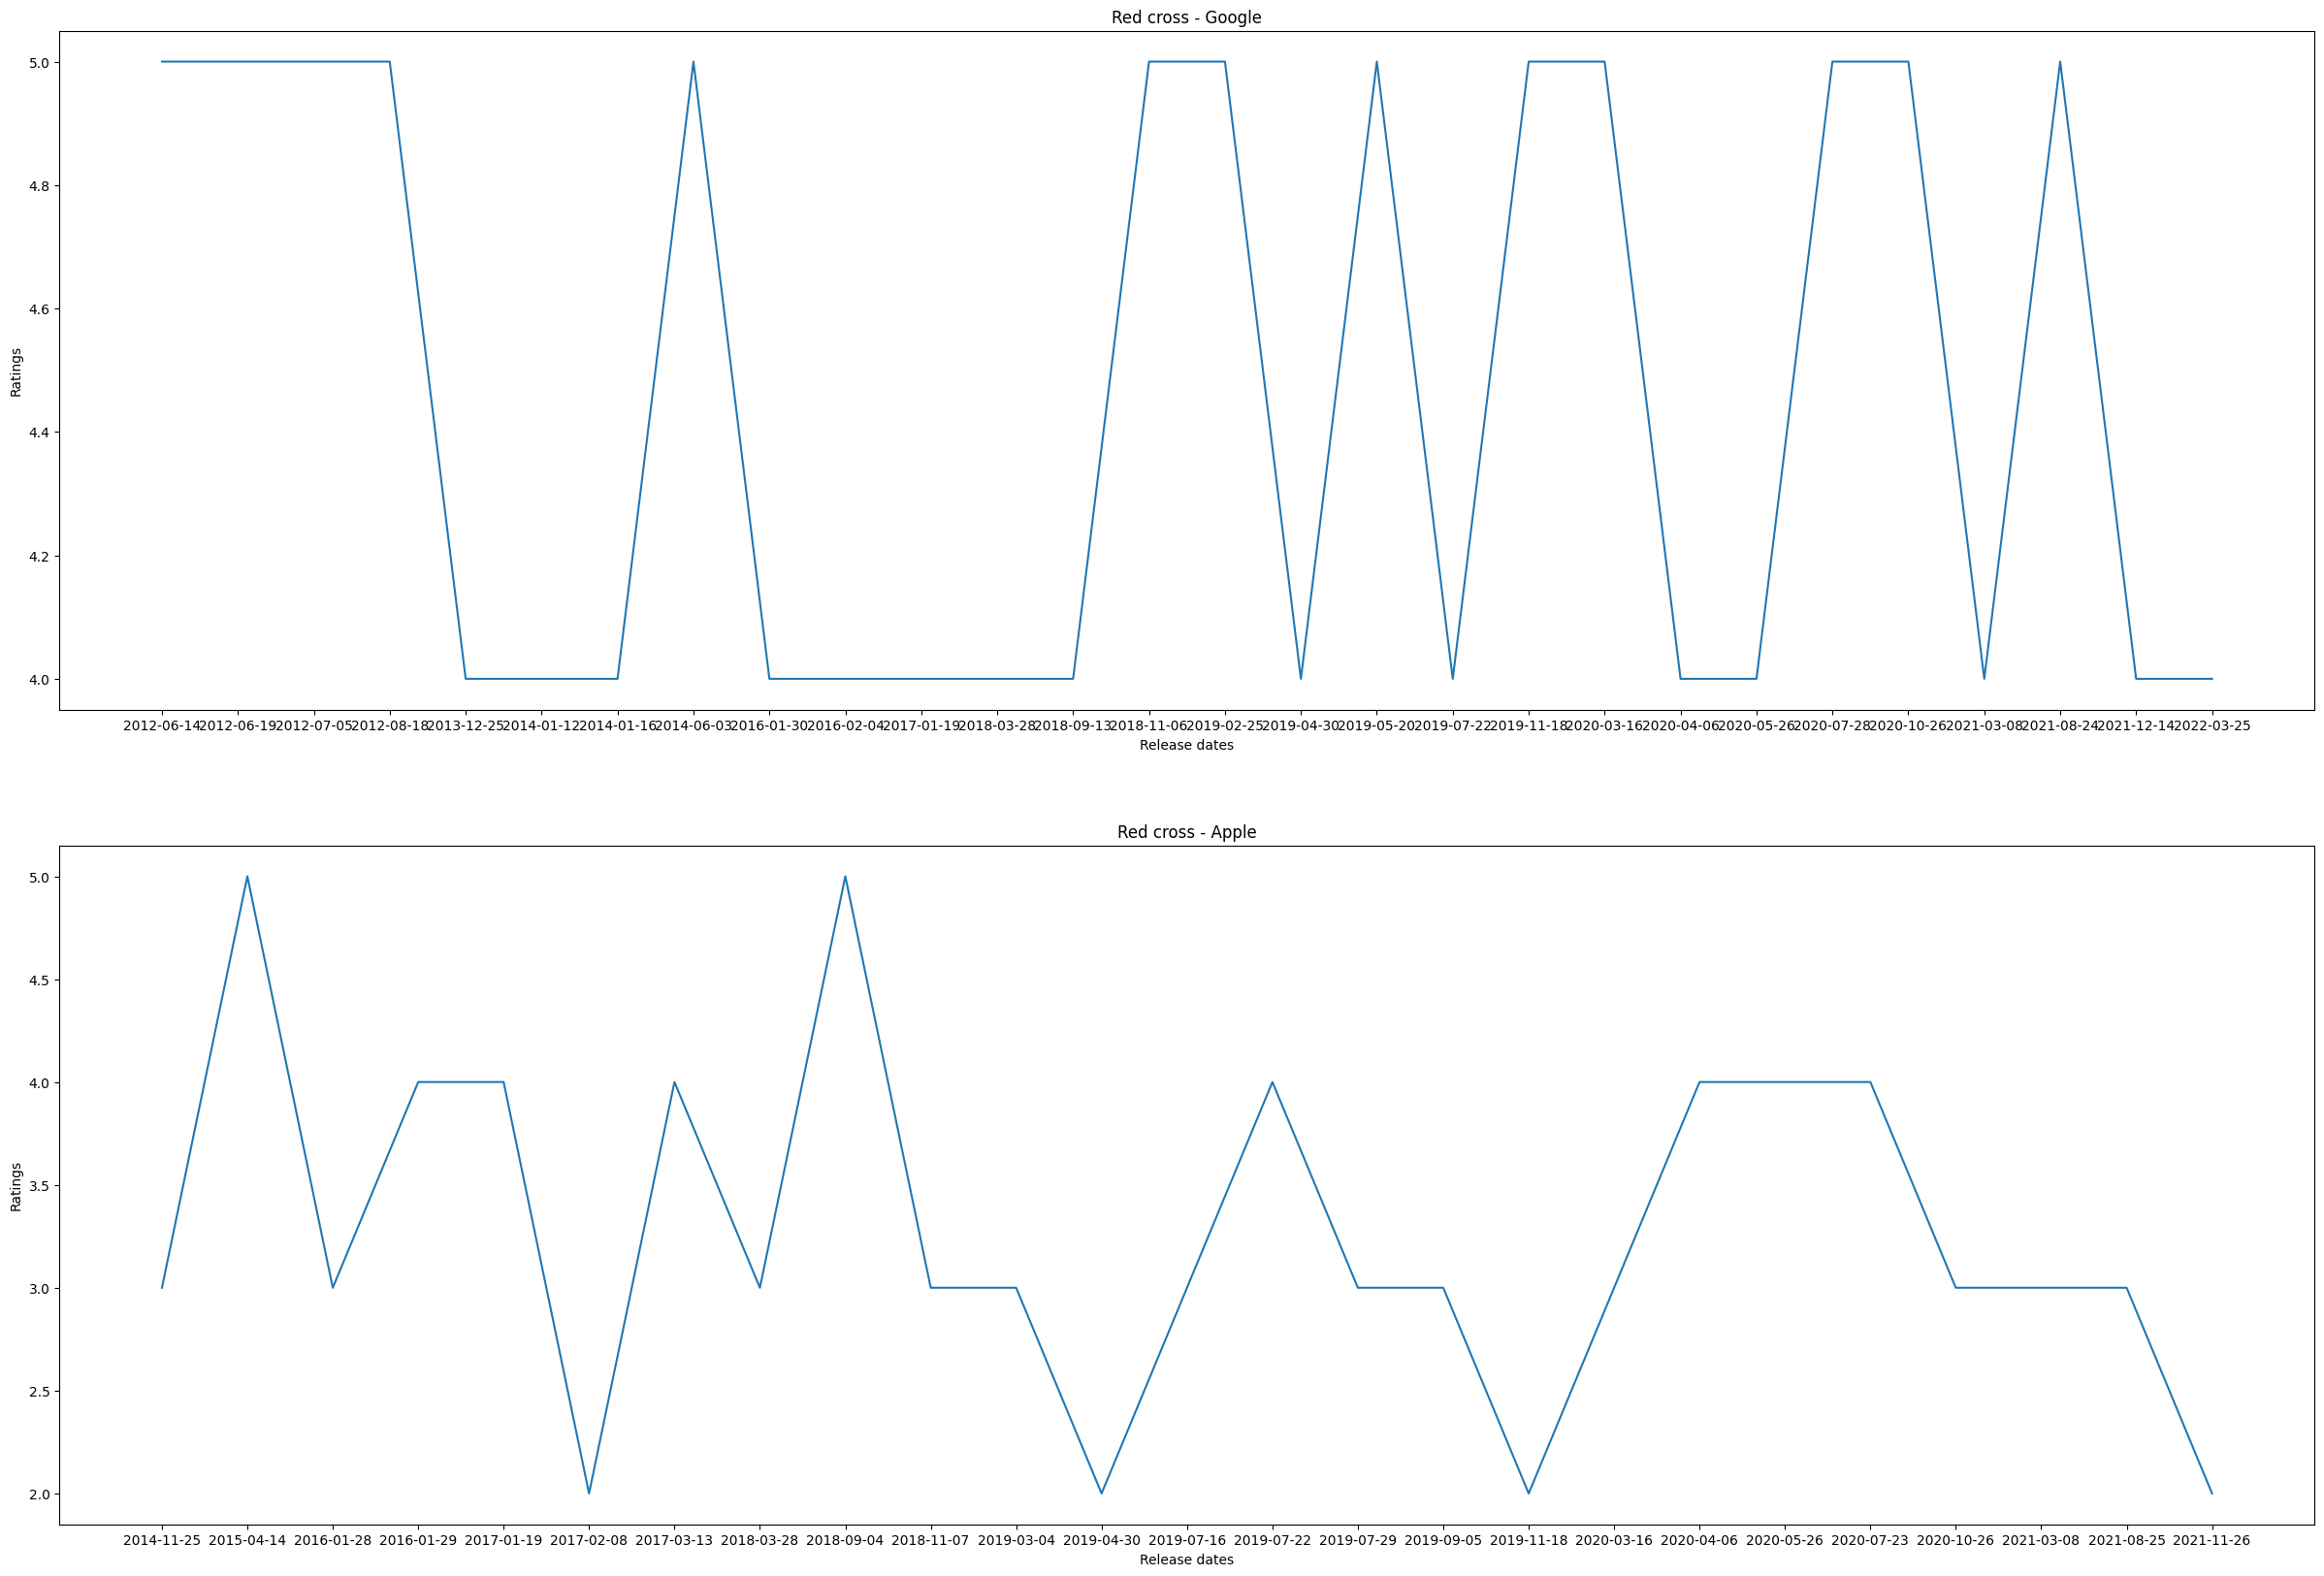

In [2]:
#writing functions - testing II - more improved

import matplotlib.pyplot as plt
from datetime import datetime

df_emergencyplus_google_versions = pd.read_csv('emergencyplus_version_details_google.csv') 
df_firstaid_google_vesions = pd.read_csv('firstaid_version_details_google.csv')
df_emergencyplus_apple_versions = pd.read_csv('emergencyplus_version_details_apple.csv') 
df_firstaid_apple_vesions = pd.read_csv('firstaid_version_details_apple.csv')

# dates= df_emergencyplus_google_versions['ReleaseDate'] ##jsut the string of dates??
# print(dates)

def indexingDateCol(df):
    df['Date of Review']=pd.to_datetime(df['Date of Review'])
    df = df.set_index(df['Date of Review'])
    df = df.sort_index(ascending=False)
    
    return df



def averageOfratingperreleasedate(df,version_df):
    average_rating_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            
        else:
            df_new = df[dates[i]:dates[i-1]]
            
            
        average_rating_list.append(getAverageRating(df_new))

    return average_rating_list

def getAverageRating(df):
    mean = 0
    if(df.empty): #when particular range contains no values
        mean = 3 #assumption that average rating will be neural
    else:
        mean = round(df['Rating'].mean())
    return mean


fig, ax = plt.subplots(1,2, figsize=(15,5))

def plotRating1(df,rating_list, ax,col, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax[col].plot(dates, rating_list[::-1])
    ax[col].set_xlabel('Release dates')
    ax[col].set_ylabel(ylabelName)
    fig.autofmt_xdate()
    
def plotRating2(df,rating_list, ax, ylabelName):  
    dates = df['ReleaseDate']
    dates = dates[::-1]
    
    #fig, ax = plt.subplots()
    ax.plot(dates, rating_list[::-1])
    ax.set_xlabel('Release dates')
    ax.set_ylabel(ylabelName)
    fig.autofmt_xdate()

rating_list1 = averageOfratingperreleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
ax[0].set_title('Emergency plus - Google')
plotRating1(df_emergencyplus_google_versions, rating_list1,ax, 0, "Ratings")

rating_list2 = averageOfratingperreleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
ax[1].set_title('Emergency plus - Apple')
plotRating1(df_emergencyplus_apple_versions,rating_list2,ax, 1 , "Ratings")

fig1, ax1 = plt.subplots(2, figsize=(30,20))

rating_list3 = averageOfratingperreleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
ax1[0].set_title('Red cross - Google')
plotRating1(df_firstaid_google_vesions,rating_list3, ax1,0, "Ratings")

rating_list4 = averageOfratingperreleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
ax1[1].set_title('Red cross - Apple')
plotRating1(df_firstaid_apple_vesions, rating_list4, ax1,1, "Ratings")



## Task 4.2 - plotting sentiment over time

C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\3762847077.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\3762847077.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\3762847077.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_new = df[dates[i]:dates[i-1]]
C:\Users\Kalpani Ranasinghe\AppData\Local\Temp\ipykernel_11508\3762847077.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is 

[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


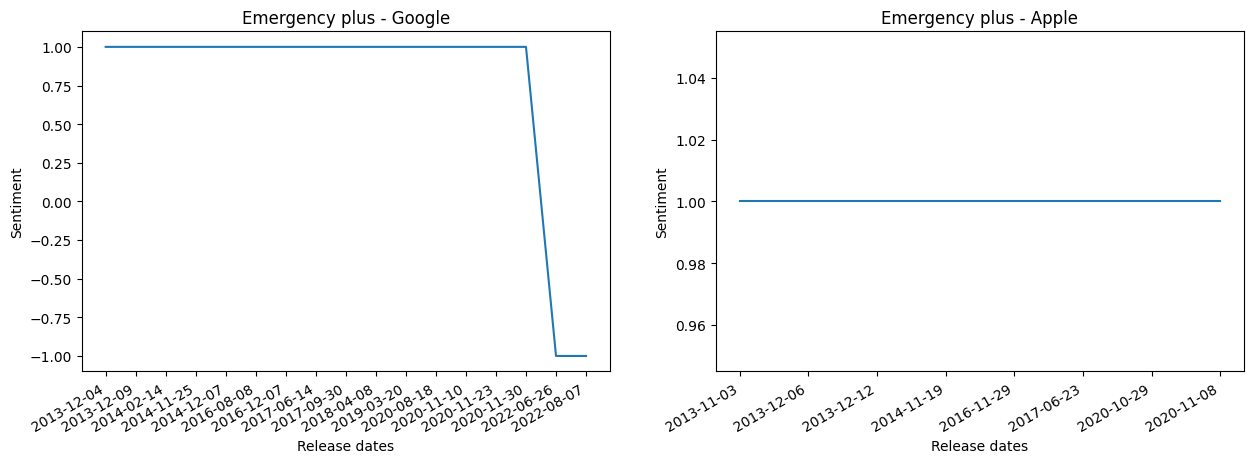

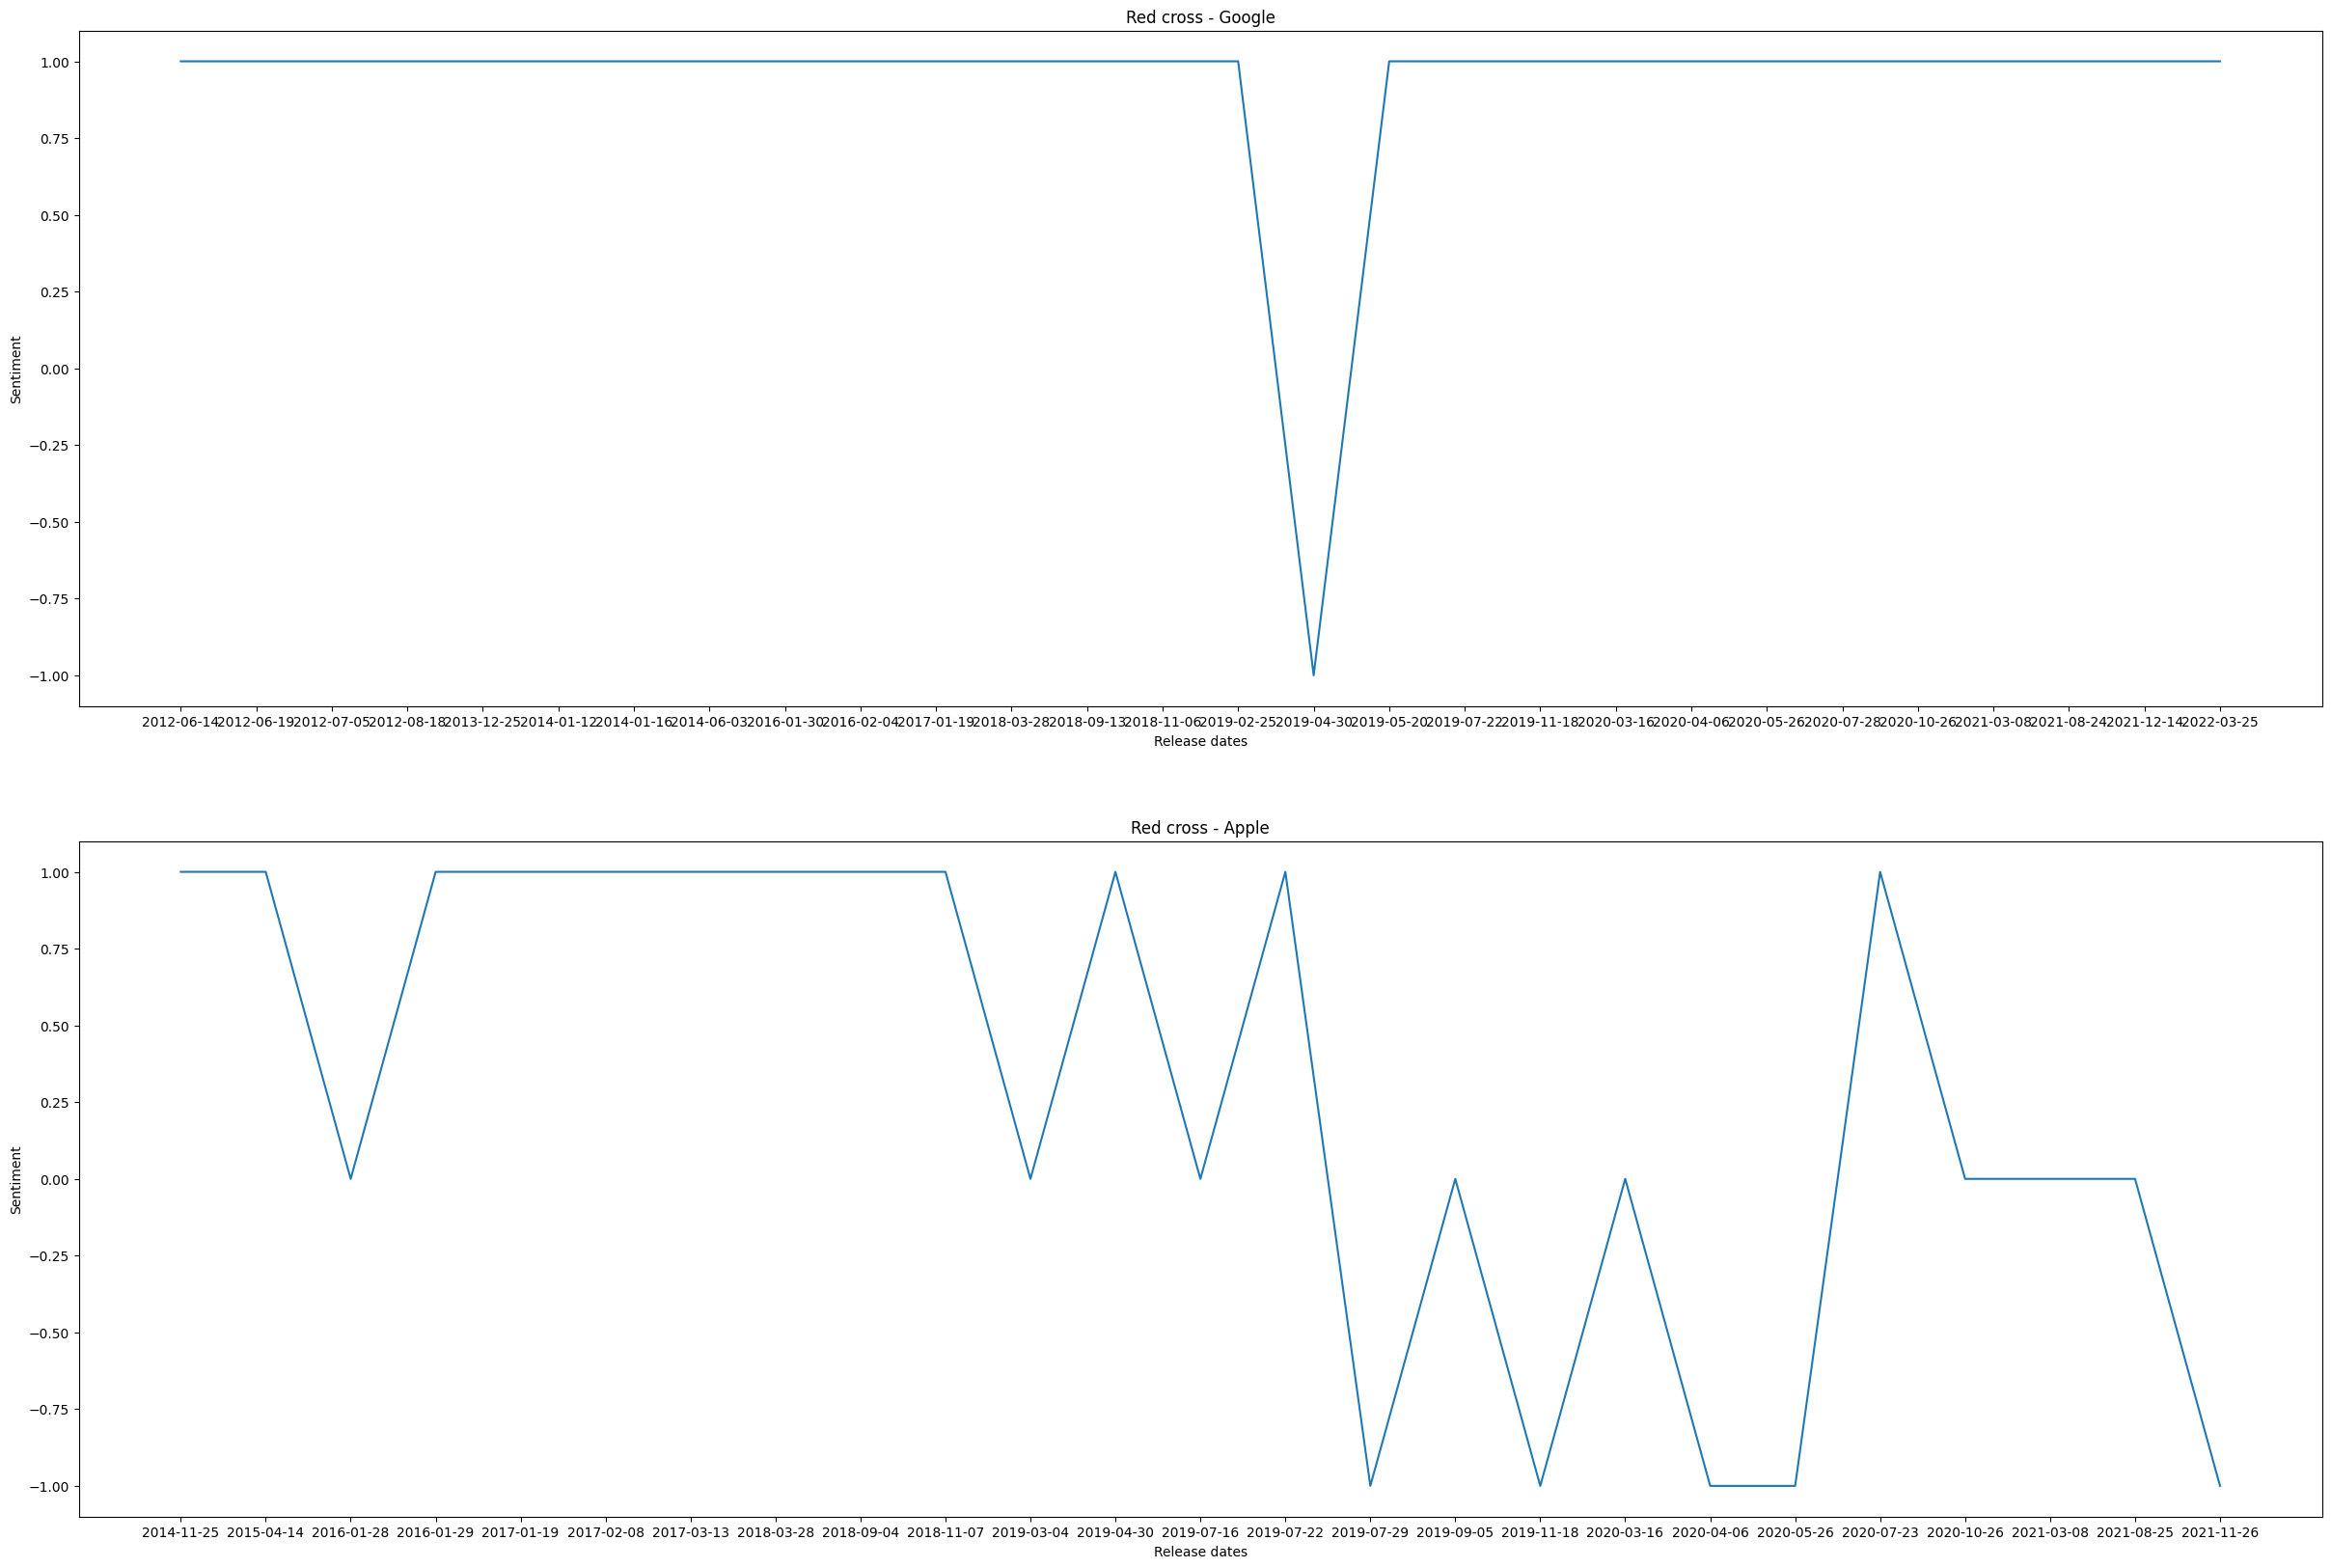

In [3]:
def sentimentperreleasedate(df,version_df):
    sentiment_list = []
    dates= version_df['ReleaseDate']
    df = indexingDateCol(df)
    df_new = pd.DataFrame()
    for i in range(0, len(dates)):
        if(i==0):
            df_new = df[dates[i]:]
            #print("0 here", df_new)
        else:
            df_new = df[dates[i]:dates[i-1]]
            #print("others here", df_new)
        
        sentiment_list.append(getFrequentSentiment(df_new))

    return sentiment_list

def getFrequentSentiment(df):
    sentiment = 0
    if(df.empty): #when particular range contains no values
        sentiment = 0 #assumption that average rating will be neural
    else:
        sentiment = df['sentiment'].mode()[0]
        #print("sentiment!!!!!: ", sentiment)
    return sentiment

fig, ax = plt.subplots(1,2, figsize=(15,5))
sentiment_list1 = sentimentperreleasedate(df_emergencyplus_google_s, df_emergencyplus_google_versions)
print(sentiment_list1)
ax[0].set_title('Emergency plus - Google')
plotRating1(df_emergencyplus_google_versions, sentiment_list1,ax, 0, "Sentiment")

sentiment_list2 = sentimentperreleasedate(df_emergencyplus_apple_s, df_emergencyplus_apple_versions)
ax[1].set_title('Emergency plus - Apple')
plotRating1(df_emergencyplus_apple_versions,sentiment_list2,ax, 1, "Sentiment")

fig1, ax1 = plt.subplots(2, figsize=(30,20))

sentiment_list3 = sentimentperreleasedate(df_firstaid_google_s, df_firstaid_google_vesions)
ax1[0].set_title('Red cross - Google')
plotRating1(df_firstaid_google_vesions,sentiment_list3, ax1,0, "Sentiment")

sentiment_list4 = sentimentperreleasedate(df_firstaid_apple_s, df_firstaid_apple_vesions)
ax1[1].set_title('Red cross - Apple')
plotRating1(df_firstaid_apple_vesions, sentiment_list4, ax1,1, "Sentiment")
